In [3]:
import lief # Utilities for ELFs
import os   
import lddwrap # Parsing SO of ELF
import pathlib # for lddwrap
import networkx as nx # Graph functions for visualisation and import
import matplotlib.pyplot as plt
from pathlib import Path
from src.Graph import Graph # Graph functions for analyzing
from src.PageRank import PageRank # PageRank metric
from src.HITS import HITS # HITS metric

In [5]:
# When uncommented: shows number of libraries imported in files
for item in os.scandir(path='/bin'):
    if lief.is_elf('/bin/'+item.name):
        c = 0
        path = pathlib.Path("/bin/"+item.name)
        try:
            deps = lddwrap.list_dependencies(path=path)
            #print(item.name)
            for dep in deps:
                c = c+1
                #if dep.path == None:
                    #print(dep.soname)
                #else:
                    #print(dep.path)
            #print(c)
        except: pass 

Unable to open the file '/bin/tnameserv'
Unable to open the file '/bin/pack200'
Unable to open the file '/bin/unpack200'
Unable to open the file '/bin/augenrules'
Unable to open the file '/bin/servertool'
Unable to open the file '/bin/rmid'
Unable to open the file '/bin/orbd'


# Analysis of application's connections

In [2]:
# Making list of impots for "Zettlr" 
libs = []
path = pathlib.Path("/bin/zettlr")
deps = lddwrap.list_dependencies(path=path)
for dep in deps:
    if dep.path == None:
        libs.append(dep.soname)
    else:
        libs.append(str(dep.path))
# Making nx graph based on SO imports for every SO
G = nx.DiGraph()
start_path = pathlib.Path("/bin/zettlr")
for lib in libs:
    if lib[8:9] != "/" : 
        continue
    G.add_edge(str(start_path), str(lib))
    path = pathlib.Path(lib)
    deps = lddwrap.list_dependencies(path=path)
    for dep in deps:
        if (str(dep.path)[8:9] == "6") or (dep.path == None):
            continue
        #print(dep.path)
        if dep.path == None:
            G.add_edge(str(lib), str(dep.soname))
        else:
            G.add_edge(str(lib), str(dep.path))

In [3]:
# Making src graph -//-
LG = Graph()
start_path = pathlib.Path("/bin/zettlr")
for lib in libs:
    if lib[8:9] != "/" : # Screening out file not from /usr/lib/
        continue
    LG.add_edge(str(start_path), str(lib))
    path = pathlib.Path(lib)
    deps = lddwrap.list_dependencies(path=path)
    for dep in deps:
        if (str(dep.path)[8:9] == "6") or (dep.path == None):  # Screening out file not from /usr/lib/
            continue
        if dep.path == None:
            LG.add_edge(str(lib), str(dep.soname))
        else:
            LG.add_edge(str(lib), str(dep.path))

# PageRank

In [4]:
def output_PageRank(iteration, graph, damping_factor):
    PageRank(graph, damping_factor, iteration)
    pagerank_list = graph.get_pagerank_list()
    print('PageRank:')
    print(pagerank_list)
    return pagerank_list

In [23]:
damping_factor = 0.85 
iteration = 15 
colors_page = output_PageRank(iteration, LG, damping_factor)

PageRank:
[0.009 0.017 0.074 0.02  0.01  0.01  0.011 0.012 0.011 0.009 0.009 0.009
 0.01  0.009 0.01  0.01  0.009 0.009 0.009 0.009 0.01  0.009 0.009 0.009
 0.009 0.009 0.009 0.011 0.009 0.01  0.01  0.009 0.009 0.009 0.012 0.01
 0.01  0.013 0.013 0.009 0.009 0.011 0.01  0.009 0.009 0.009 0.009 0.009
 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009
 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009
 0.009 0.009 0.009 0.009 0.01  0.009 0.009 0.009 0.009 0.009 0.009 0.009
 0.009 0.009 0.009 0.009 0.009 0.01  0.009 0.009 0.01  0.009 0.009 0.009
 0.009 0.009]


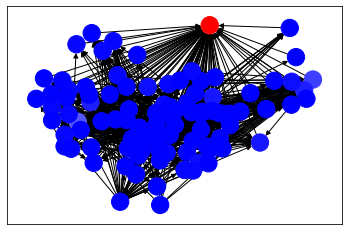

In [24]:
nx.draw_networkx(G, node_color=colors_page, with_labels = False, cmap = "bwr")

# HITS

In [5]:
def output_HITS(iteration, graph):
    HITS(graph, iteration)
    auth_list, hub_list = graph.get_auth_hub_list()
    print('Authority:')
    print(auth_list)
    print('Hub:')
    print(hub_list)
    return auth_list, hub_list

In [26]:
iteration = 500 # Default 500
colors_auth, colors_hubs = output_HITS(iteration, LG)

Authority:
[0.    0.031 0.042 0.032 0.02  0.019 0.023 0.022 0.023 0.003 0.014 0.015
 0.021 0.015 0.017 0.015 0.003 0.003 0.004 0.004 0.004 0.003 0.006 0.005
 0.009 0.006 0.01  0.018 0.01  0.014 0.014 0.01  0.01  0.01  0.019 0.015
 0.01  0.019 0.019 0.003 0.007 0.02  0.017 0.009 0.009 0.003 0.005 0.007
 0.011 0.016 0.011 0.009 0.013 0.016 0.012 0.007 0.007 0.005 0.008 0.007
 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.012 0.016 0.013 0.012
 0.012 0.012 0.014 0.016 0.012 0.003 0.003 0.003 0.003 0.004 0.004 0.004
 0.004 0.004 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.003]
Hub:
[0.065 0.003 0.    0.003 0.005 0.009 0.006 0.003 0.005 0.003 0.019 0.01
 0.003 0.007 0.003 0.003 0.008 0.008 0.007 0.007 0.007 0.008 0.01  0.027
 0.011 0.026 0.011 0.009 0.011 0.005 0.003 0.003 0.003 0.003 0.005 0.01
 0.003 0.003 0.003 0.003 0.025 0.003 0.005 0.003 0.01  0.058 0.052 0.042
 0.029 0.015 0.029 0.031 0.017 0.015 0.003 0.032 0.005 0.02  0.01  0.003
 0.006 0.007 0.003 0.01

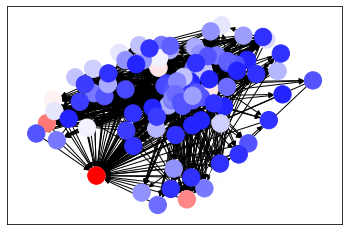

In [27]:
nx.draw_networkx(G, node_color=colors_auth, with_labels = False, cmap = "bwr")

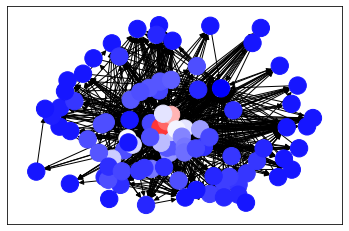

In [28]:
nx.draw_networkx(G, node_color=colors_hubs, with_labels = False, cmap = "bwr")

# Import

In [ ]:
# Making dictionaries for every metric
dict_page = {}
k = 0
for i in colors_page:
    dict_page.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_page, "page" )    

dict_auth = {}
k = 0
for i in colors_auth:
    dict_auth.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_auth, "auth" )        

dict_hubs = {}
k = 0
for i in colors_hubs:
    dict_hubs.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_hubs, "hubs" )    

nx.write_gexf(G, "zetshell.gexf")

# Analysis of network module in ArchLinux

In [2]:
# Printing all SO of netmodule
netmodules = ['nmcli', 'dhcpcd', 'networkctl', 'ping', 'ip', 'ss', 'udevadm']

for i in netmodules:
    if lief.is_elf('/bin/'+i):
        c = 0
        path = pathlib.Path("/bin/"+i)
        try:
            deps = lddwrap.list_dependencies(path=path)
            print(i)
            for dep in deps:
                c = c+1
                if dep.path == None:
                    print(dep.soname)
                else:
                    print(dep.path)
            print(c)
            print('')
        except: pass 

nmcli
linux-vdso.so.1
/usr/lib/libnm.so.0
/usr/lib/libgio-2.0.so.0
/usr/lib/libgobject-2.0.so.0
/usr/lib/libglib-2.0.so.0
/usr/lib/libreadline.so.8
/usr/lib/libpthread.so.0
/usr/lib/libc.so.6
/usr/lib64/ld-linux-x86-64.so.2
/usr/lib/libgmodule-2.0.so.0
/usr/lib/libudev.so.1
/usr/lib/libdl.so.2
/usr/lib/libuuid.so.1
/usr/lib/libsmime3.so
/usr/lib/libnss3.so
/usr/lib/libnspr4.so
/usr/lib/libz.so.1
/usr/lib/libmount.so.1
/usr/lib/libresolv.so.2
/usr/lib/libffi.so.7
/usr/lib/libpcre.so.1
/usr/lib/libncursesw.so.6
/usr/lib/librt.so.1
/usr/lib/libnssutil3.so
/usr/lib/libplds4.so
/usr/lib/libplc4.so
/usr/lib/libblkid.so.1
27

dhcpcd
linux-vdso.so.1
/usr/lib/libdl.so.2
/usr/lib/libc.so.6
/usr/lib64/ld-linux-x86-64.so.2
4

networkctl
linux-vdso.so.1
/usr/lib/systemd/libsystemd-shared-248.so
/usr/lib/libc.so.6
/usr/lib/libacl.so.1
/usr/lib/libblkid.so.1
/usr/lib/libcap.so.2
/usr/lib/libcrypt.so.2
/usr/lib/libgcrypt.so.20
/usr/lib/libip4tc.so.2
/usr/lib/libkmod.so.2
/usr/lib/liblz4.so.1
/usr/lib/

In [3]:
# Making list of impots for netmodule
libs = []
G = nx.DiGraph()
for i in netmodules:
    path = pathlib.Path("/bin/"+i)
    deps = lddwrap.list_dependencies(path=path)
    for dep in deps:
        if dep.path == None:
            libs.append(dep.soname)
        else:
            libs.append(str(dep.path))
# Making nx graph based on SO imports for every SO
    start_path = pathlib.Path("/bin/"+i)
    for lib in libs:
        if lib[8:9] != "/" : 
            continue
        G.add_edge(str(start_path), str(lib))
        path = pathlib.Path(lib)
        deps = lddwrap.list_dependencies(path=path)
        for dep in deps:
            if (str(dep.path)[8:9] == "6") or (dep.path == None):
                continue
            if dep.path == None:
                G.add_edge(str(lib), str(dep.soname))
            else:
                G.add_edge(str(lib), str(dep.path))

In [4]:
LG = Graph()
for i in netmodules:
    start_path = pathlib.Path("/bin/"+i)
    for lib in libs:
        if lib[8:9] != "/" :  # Screening out file not from /usr/lib/
            continue
        LG.add_edge(str(start_path), str(lib))
        path = pathlib.Path(lib)
        deps = lddwrap.list_dependencies(path=path)
        for dep in deps:
            if (str(dep.path)[8:9] == "6") or (dep.path == None):  # Screening out file not from /usr/lib/
                continue
            if dep.path == None:
                LG.add_edge(str(lib), str(dep.soname))
            else:
                LG.add_edge(str(lib), str(dep.path))

# PageRank 

In [5]:
def output_PageRank(iteration, graph, damping_factor):
    PageRank(graph, damping_factor, iteration)
    pagerank_list = graph.get_pagerank_list()
    print('PageRank:')
    print(pagerank_list)
    return pagerank_list

In [6]:
damping_factor = 0.85
iteration = 10
colors_page = output_PageRank(iteration, LG, damping_factor)

PageRank:
[0.016 0.017 0.017 0.017 0.018 0.017 0.017 0.024 0.017 0.017 0.017 0.019
 0.032 0.088 0.019 0.017 0.017 0.018 0.019 0.019 0.017 0.018 0.018 0.018
 0.017 0.018 0.017 0.017 0.017 0.017 0.017 0.017 0.017 0.017 0.017 0.017
 0.017 0.017 0.017 0.017 0.018 0.017 0.018 0.017 0.018 0.017 0.017 0.016
 0.016 0.016 0.016 0.016 0.016]


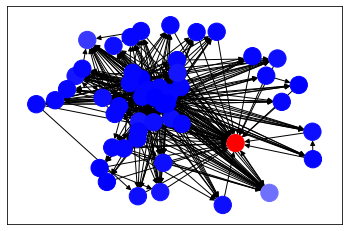

In [7]:
nx.draw_networkx(G, node_color=colors_page, with_labels = False, cmap = "bwr")

# HITS

In [8]:
def output_HITS(iteration, graph):
    HITS(graph, iteration)
    auth_list, hub_list = graph.get_auth_hub_list()
    print('Authority:')
    print(auth_list)
    print('Hub:')
    print(hub_list)
    return auth_list, hub_list

In [9]:
iteration = 500 # Default 500
colors_auth, colors_hubs = output_HITS(iteration, LG)

Authority:
[0.    0.019 0.021 0.022 0.022 0.022 0.021 0.027 0.021 0.021 0.021 0.023
 0.029 0.031 0.024 0.023 0.022 0.024 0.023 0.024 0.022 0.022 0.022 0.023
 0.019 0.02  0.019 0.021 0.021 0.021 0.021 0.021 0.021 0.021 0.021 0.021
 0.021 0.021 0.021 0.021 0.021 0.021 0.021 0.019 0.02  0.019 0.019 0.
 0.    0.    0.    0.    0.   ]
Hub:
[0.088 0.045 0.028 0.011 0.007 0.012 0.007 0.003 0.003 0.017 0.016 0.008
 0.003 0.    0.003 0.009 0.003 0.003 0.005 0.005 0.014 0.01  0.01  0.003
 0.004 0.003 0.048 0.003 0.003 0.003 0.005 0.003 0.015 0.003 0.008 0.007
 0.011 0.003 0.005 0.005 0.003 0.007 0.003 0.004 0.003 0.005 0.003 0.088
 0.088 0.088 0.088 0.088 0.088]


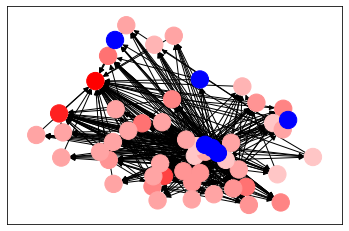

In [10]:
nx.draw_networkx(G, node_color=colors_auth, with_labels = False, cmap = "bwr")

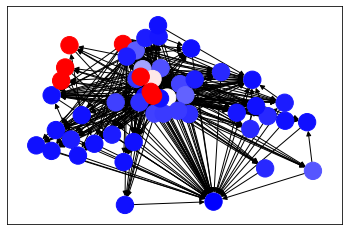

In [11]:
nx.draw_networkx(G, node_color=colors_hubs, with_labels = False, cmap = "bwr")

# Import

In [12]:
# Making dictionaries for every metric
dict_page = {}
k = 0
for i in colors_page:
    dict_page.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_page, "page" )    

dict_auth = {}
k = 0
for i in colors_auth:
    dict_auth.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_auth, "auth" )        

dict_hubs = {}
k = 0
for i in colors_hubs:
    dict_hubs.update({LG.nodes[k].name: i})
    k = k + 1
nx.set_node_attributes(G, dict_hubs, "hubs" )    

nx.write_gexf(G, "netgraph.gexf")